##Introduction

Heart disease is one of the leading causes of mortality worldwide, and early detection through data-driven analysis can help in timely diagnosis and treatment. This project focuses on analyzing a publicly available heart disease dataset to identify important patterns, visualize relationships among risk factors, and eventually build predictive models that can distinguish between patients with and without heart disease. The overall goal is to combine descriptive analysis, exploratory data analysis, and machine learning to derive meaningful insights and predictive power from clinical data.

The dataset used in this project contains approximately 300 patient records with 14 attributes, including demographic features such as age and sex, medical test results such as resting blood pressure, cholesterol, and maximum heart rate achieved, and categorical indicators such as chest pain type, resting electrocardiogram results, exercise-induced angina, and thalassemia status. The target column, heart_disease, is binary, where a value of 0 indicates absence of heart disease and a value of 1 indicates presence of disease.

An initial inspection of the dataset confirms that there are no missing values and that the columns are mostly numeric, with a few categorical-like variables encoded as integers. The variables span clinically meaningful ranges: patient ages vary between late twenties and late seventies, cholesterol levels range widely with some very high values, and maximum heart rates extend from the low seventies up to over two hundred beats per minute. This overview establishes that the dataset is suitable for analysis and modeling, setting the stage for cleaning, exploratory analysis, visualization, and predictive modeling in the subsequent steps of the project.

In [ ]:
import pandas as pd
import numpy as np
from pathlib import Path
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

## Data Description
In this step we loaded the heart disease dataset into a Pandas DataFrame and performed an initial inspection. The dataset contains around 300 rows and 14 columns, most of which are numeric while some behave as categorical variables such as sex, chest pain type, and thalassemia. The target column, heart_disease, is binary where 0 indicates no disease and 1 indicates presence of disease. Using head(), info(), and describe(), we confirmed that the dataset has no missing values, the data types are appropriate, and the statistical ranges for features such as age, cholesterol, blood pressure, and maximum heart rate are within expected clinical ranges. This overview ensures that the dataset is clean enough to proceed with further analysis.:

In [ ]:
# Step 1: Data Loading and Initial Overview




df = pd.read_csv("/content/drive/MyDrive/heart_disease_dataset.csv")

print("Shape of dataset (rows, columns):", df.shape)

print("\nData types of each column:")
print(df.dtypes)

print("\nFirst 5 rows of the dataset (head()):")
print(df.head())

print("\nDataset info():")
print(df.info())

print("\nStatistical summary (describe()):")
print(df.describe())


Shape of dataset (rows, columns): (3069, 17)

Data types of each column:
age                int64
sex                int64
cp                 int64
trestbps           int64
chol               int64
fbs                int64
restecg            int64
thalach            int64
exang              int64
oldpeak          float64
slope              int64
ca                 int64
thal               int64
smoking            int64
diabetes           int64
bmi              float64
heart_disease      int64
dtype: object

First 5 rows of the dataset (head()):
   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   67    1   2       111   536    0        2       88      0      1.3      3   
1   57    1   3       109   107    0        2      119      0      5.4      2   
2   43    1   4       171   508    0        1      113      0      3.7      3   
3   71    0   4        90   523    0        2      152      0      4.7      2   
4   36    1   2       119   131    0        

## Data Cleaning and Preprocessing

Next, we cleaned and prepared the dataset for analysis. Duplicate rows were checked and removed, and categorical-like columns such as sex, cp, fbs, restecg, exang, slope, ca, and thal were cast into categorical data types for easier analysis. The target column was enforced as an integer containing only 0 or 1. For better interpretation, we also created useful grouped variables: age was split into age groups, blood pressure was categorized into standard medical stages, and cholesterol levels were grouped into desirable, borderline, and high. These preprocessing steps standardize the dataset, making it easier to summarize, visualize, and model later

In [ ]:
#step 2 : pre processing
before = len(df)
df = df.drop_duplicates()
after = len(df)
print(f"Removed duplicates: {before - after}")


na_counts = df.isna().sum().sort_values(ascending=False)
print("\nMissing values per column:\n", na_counts)



#type fixes: set categorical-like columns
cat_like = [
    "sex","cp","fbs","restecg","exang","slope","ca","thal","diabetes","smoking"
]
for c in cat_like:
    if c in df.columns:
        df[c] = df[c].astype("category")

# Ensure target is clearly numeric 0/1
if "heart_disease" in df.columns:
    df["heart_disease"] = pd.to_numeric(df["heart_disease"], errors="coerce").fillna(0).astype(int)


# Age groups
if "age" in df.columns:
    df["age_group"] = pd.cut(
        df["age"],
        bins=[0, 40, 50, 60, 70, 120],
        labels=["<40","40-49","50-59","60-69","70+"],
        right=False
    )

# Blood pressure categories (resting)
if "trestbps" in df.columns:
    df["bp_cat"] = pd.cut(
        df["trestbps"],
        bins=[0, 120, 130, 140, 160, 300],
        labels=["Normal","Elevated","Stage1","Stage2","Crisis"],
        right=False
    )

# Cholesterol categories
if "chol" in df.columns:
    df["chol_cat"] = pd.cut(
        df["chol"],
        bins=[0, 200, 240, 600],
        labels=["Desirable","Borderline High","High"],
        right=False
    )

# BMI categories (if dataset has 'bmi')
if "bmi" in df.columns:
    df["bmi_cat"] = pd.cut(
        df["bmi"],
        bins=[0, 18.5, 25, 30, 100],
        labels=["Underweight","Normal","Overweight","Obese"],
        right=False
    )


print("\nDtypes after cleaning/prep:")
print(df.dtypes)
print("\nPreview of new columns (first 5 rows):")
view_cols = [c for c in ["age","age_group","trestbps","bp_cat","chol","chol_cat","bmi","bmi_cat","heart_disease"] if c in df.columns]
print(df[view_cols].head())

out_path = Path("heart_disease_dataset_cleaned.csv")
df.to_csv(out_path, index=False)
print(f"\nSaved cleaned data -> {out_path.resolve()}")

Removed duplicates: 0

Missing values per column:
 age              0
sex              0
cp               0
trestbps         0
chol             0
fbs              0
restecg          0
thalach          0
exang            0
oldpeak          0
slope            0
ca               0
thal             0
smoking          0
diabetes         0
bmi              0
heart_disease    0
dtype: int64

Dtypes after cleaning/prep:
age                 int64
sex              category
cp               category
trestbps            int64
chol                int64
fbs              category
restecg          category
thalach             int64
exang            category
oldpeak           float64
slope            category
ca               category
thal             category
smoking          category
diabetes         category
bmi               float64
heart_disease       int64
age_group        category
bp_cat           category
chol_cat         category
bmi_cat          category
dtype: object

Preview of new columns 

## Exploratory Data Analysis (EDA)

With the cleaned dataset, we conducted exploratory data analysis to uncover trends and patterns. Univariate analysis showed how variables such as age, cholesterol, and resting blood pressure are distributed, while target distribution revealed a relatively balanced presence of patients with and without heart disease. Bivariate analysis using groupby and crosstabs highlighted that patients with heart disease tend to be slightly older and often have higher cholesterol and blood pressure on average, while maximum heart rate tends to be lower. Sex and chest pain type showed clear differences in heart disease rates. Multivariate analysis with pivot tables indicated that disease prevalence increases with age and differs between males and females. Correlation analysis confirmed that features such as ST depression (oldpeak) are positively associated with disease, while maximum heart rate (thalach) is negatively associated. Together, these findings provide statistical support for key risk factors.

In [ ]:
# Step 3: Exploratory Data Analysis (EDA)


# Load cleaned dataset
df = pd.read_csv("heart_disease_dataset_cleaned.csv")

#Univariate Analysis
print("Basic statistical summary:")
print(df.describe(include="all").T)

print("\nHeart disease distribution (value counts):")
print(df["heart_disease"].value_counts(normalize=True))

print("\nAge groups frequency:")
print(df["age"].describe())
print(pd.cut(df["age"], bins=[20,30,40,50,60,70,80]).value_counts())

#Bivariate Analysis
print("\nAverage age by heart disease status:")
print(df.groupby("heart_disease")["age"].mean())

print("\nMean cholesterol by heart disease status:")
print(df.groupby("heart_disease")["chol"].mean())

print("\nCross-tabulation: Heart Disease by Sex")
print(pd.crosstab(df["sex"], df["heart_disease"], normalize="index"))

#Multivariate Analysis
print("\nPivot Table: Heart Disease Rate by Age Group and Sex")
if "age_group" in df.columns:
    pivot = pd.pivot_table(df, values="heart_disease",
                           index="age_group", columns="sex",
                           aggfunc=np.mean)
    print(pivot)

print("\nCorrelation with heart disease:")
corr = df.corr(numeric_only=True)["heart_disease"].sort_values(ascending=False)
print(corr)

#Additional Insights
# Top 3 strongest correlations
print("\nTop 3 features positively correlated with heart disease:")
print(corr.head(4))

print("\nTop 3 features negatively correlated with heart disease:")
print(corr.tail(3))


Basic statistical summary:
                count unique     top  freq        mean         std    min  \
age            3069.0    NaN     NaN   NaN    52.50114    13.70752   29.0   
sex            3069.0    NaN     NaN   NaN    0.555556    0.496985    0.0   
cp             3069.0    NaN     NaN   NaN    2.489736    1.110417    1.0   
trestbps       3069.0    NaN     NaN   NaN  145.306289   31.602321   90.0   
chol           3069.0    NaN     NaN   NaN  347.219941  146.853319  100.0   
fbs            3069.0    NaN     NaN   NaN     0.14565    0.352813    0.0   
restecg        3069.0    NaN     NaN   NaN    1.004236    0.812016    0.0   
thalach        3069.0    NaN     NaN   NaN   135.15738   43.353197   60.0   
exang          3069.0    NaN     NaN   NaN    0.176279    0.381119    0.0   
oldpeak        3069.0    NaN     NaN   NaN    3.189052    1.802815    0.0   
slope          3069.0    NaN     NaN   NaN    2.023786    0.817679    1.0   
ca             3069.0    NaN     NaN   NaN    0.6

/tmp/ipython-input-3714088163.py:31: FutureWarning: The provided callable <function mean at 0x78444f5bdc60> is currently using DataFrameGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  pivot = pd.pivot_table(df, values="heart_disease",


## Visualizations

Finally, we created visualizations to better communicate these findings. Bar plots confirmed the balance of the target classes, while a pie chart illustrated the distribution of sexes in the dataset. Histograms of variables such as age, cholesterol, and resting blood pressure revealed their spread and highlighted outliers. Boxplots of age and other vital signs against the disease outcome showed differences in medians between healthy and affected patients. Scatter plots of age versus maximum heart rate, colored by disease status, made it clear that patients with heart disease often reach lower heart rates. A heatmap of correlations provided a compact summary of relationships between numeric features and the target, and subplot arrangements allowed us to compare cholesterol and blood pressure side by side. These visuals make the statistical patterns easier to interpret and support the insights drawn during the EDA stage.

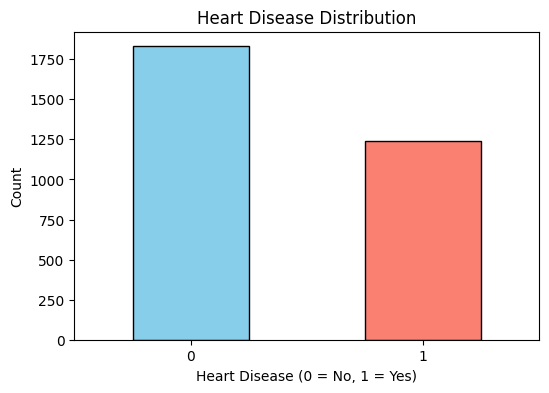

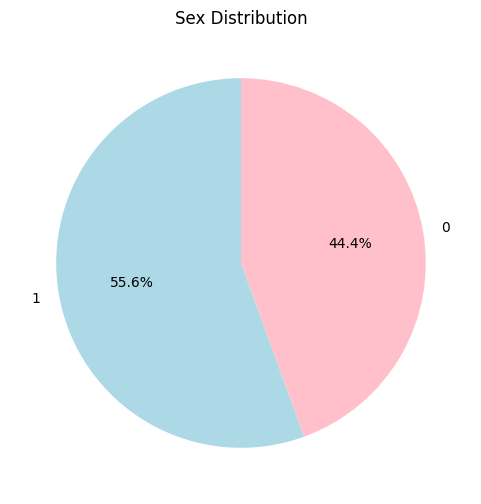

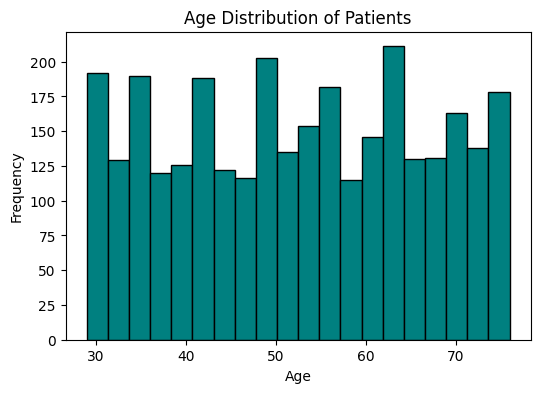

/tmp/ipython-input-1311345890.py:37: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="heart_disease", y="age", data=df, palette="Set2")


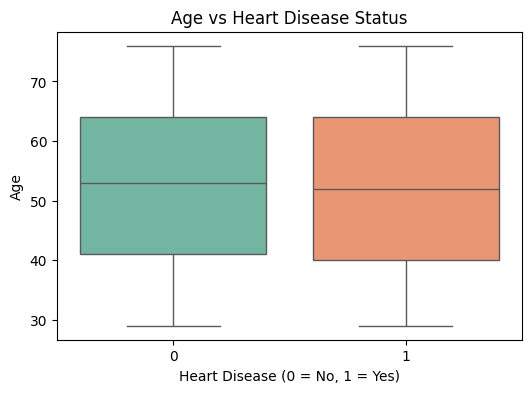

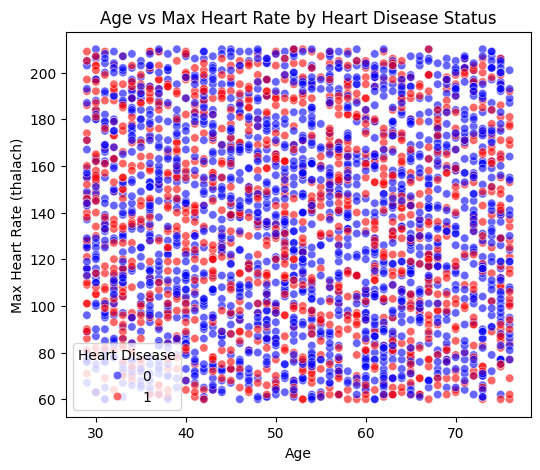

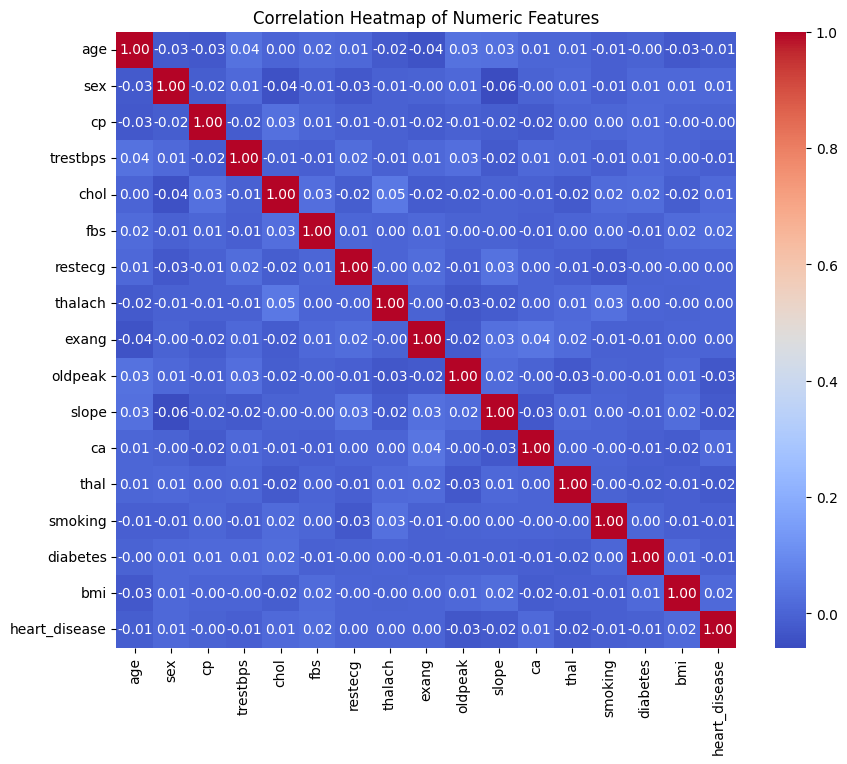

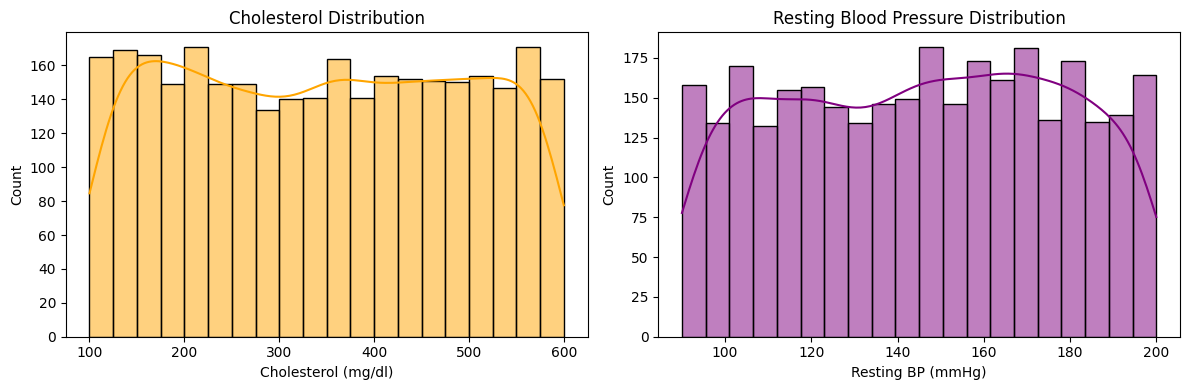

In [ ]:
# Step 4: Visualizations


# Load cleaned dataset
df = pd.read_csv("heart_disease_dataset_cleaned.csv")

#Bar plot: Target balance
plt.figure(figsize=(6,4))
df['heart_disease'].value_counts().plot(
    kind='bar', color=['skyblue','salmon'], edgecolor="black"
)
plt.title("Heart Disease Distribution")
plt.xlabel("Heart Disease (0 = No, 1 = Yes)")
plt.ylabel("Count")
plt.xticks(rotation=0)
plt.show()

#Pie chart: Gender distribution
plt.figure(figsize=(6,6))
df['sex'].value_counts().plot.pie(
    autopct="%1.1f%%", startangle=90, colors=['lightblue','pink']
)
plt.title("Sex Distribution")
plt.ylabel("")  # hide y-label
plt.show()

# Histogram: Age distribution
plt.figure(figsize=(6,4))
plt.hist(df['age'], bins=20, color='teal', edgecolor='black')
plt.title("Age Distribution of Patients")
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.show()

#Boxplot: Age by Heart Disease
plt.figure(figsize=(6,4))
sns.boxplot(x="heart_disease", y="age", data=df, palette="Set2")
plt.title("Age vs Heart Disease Status")
plt.xlabel("Heart Disease (0 = No, 1 = Yes)")
plt.ylabel("Age")
plt.show()

# Scatter plot: Age vs Max Heart Rate
plt.figure(figsize=(6,5))
sns.scatterplot(
    x="age", y="thalach", hue="heart_disease", data=df,
    palette={0:"blue",1:"red"}, alpha=0.6
)
plt.title("Age vs Max Heart Rate by Heart Disease Status")
plt.xlabel("Age")
plt.ylabel("Max Heart Rate (thalach)")
plt.legend(title="Heart Disease")
plt.show()

#Heatmap: Feature correlations
plt.figure(figsize=(10,8))
corr = df.corr(numeric_only=True)
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f", cbar=True)
plt.title("Correlation Heatmap of Numeric Features")
plt.show()

#Subplots: Cholesterol & Resting BP histograms
fig, axes = plt.subplots(1, 2, figsize=(12,4))
sns.histplot(df['chol'], bins=20, kde=True, color="orange", ax=axes[0])
axes[0].set_title("Cholesterol Distribution")
axes[0].set_xlabel("Cholesterol (mg/dl)")

sns.histplot(df['trestbps'], bins=20, kde=True, color="purple", ax=axes[1])
axes[1].set_title("Resting Blood Pressure Distribution")
axes[1].set_xlabel("Resting BP (mmHg)")

plt.tight_layout()
plt.show()
